# Imports

In [36]:
import pandas as pd
import numpy as np
import sklearn
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import tree
from sklearn import neighbors
from sklearn import metrics
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Load the dataset

data = pd.read_csv("mushrooms.csv")
data.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Check for missing values

In [37]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

We find the dataset has no missing values

# Check the shape of the data

In [38]:
data.shape

(8124, 23)

We have 8124 rows of data with 23 columns (features)

In [39]:
print("\nFeatures of the dataset:")
data.describe()



Features of the dataset:


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Getting unique values from each column, so we know what values to convert to numerical

In [40]:
for col in data.columns:
    print(col,data[col].unique())

class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


# creating a copy of the original dataframe

In [41]:
data2 = data.copy()

In [42]:
# performing Label Encoding on each of the 23 features
for col in data2.columns:
    le = LabelEncoder()
    le.fit(data2[col])
    data2[col] = le.transform(data2[col])
    if col == 'class':
        le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        print(le_name_mapping)

{'e': 0, 'p': 1}


LabelEncoding method has encoded class 'edible' to 0, and 'poisonous' to 1.

In [43]:
# check to see counts for each class
counts = data2['class'].value_counts()
print(counts)

class
0    4208
1    3916
Name: count, dtype: int64


In [44]:
data2.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


We can now perform EDA on the dataset.

# Correlation matrix

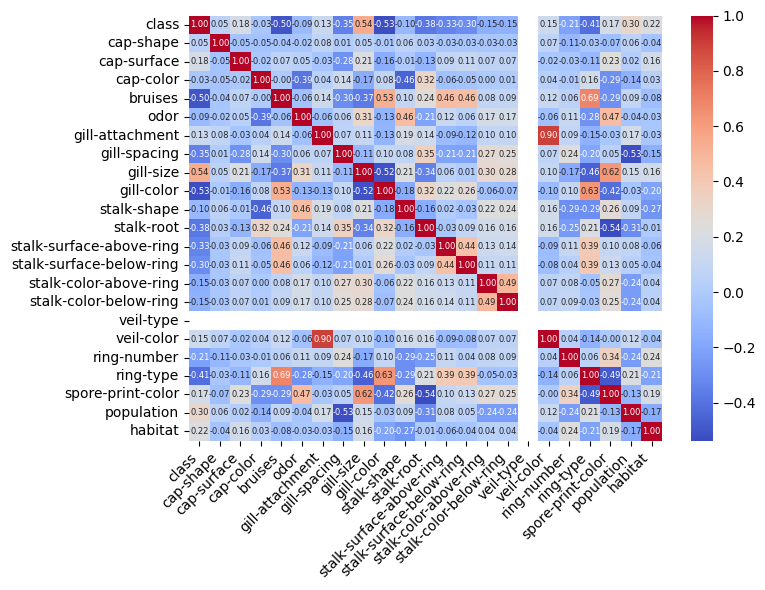

In [45]:
corr = data2.corr()
corr = data2.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, cmap='coolwarm', xticklabels=True, yticklabels=True, 
            annot=True,  
            fmt='.2f', 
            annot_kws={'size': 6}) 
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Standardizing the data

In [46]:
data3 = data2.copy()
scaler = StandardScaler()
data3 = scaler.fit_transform(data3)
data3 = pd.DataFrame(data3, columns=data2.columns)

# Correlation matrix for standardized data

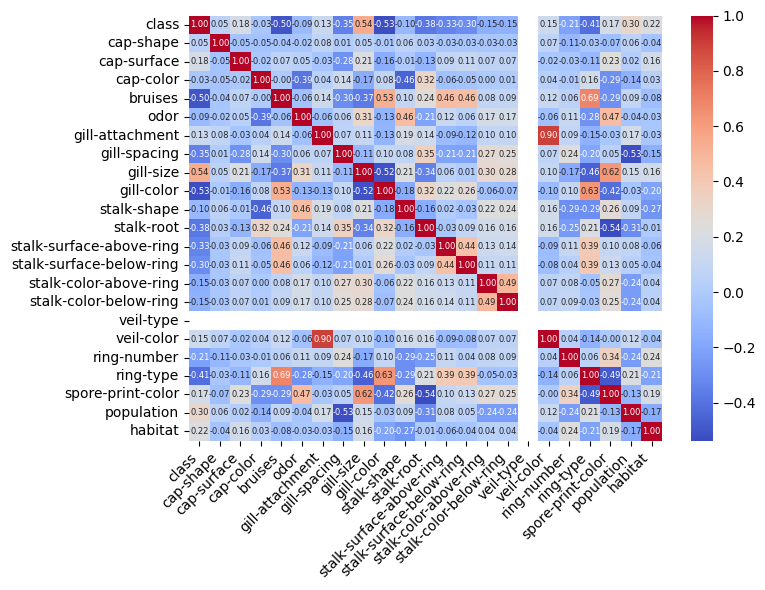

In [47]:
corr = data3.corr()
corr1 = data3.corr()
plt.figure(figsize=(8, 6))  # Adjust these numbers to change the size
sns.heatmap(corr1, cmap='coolwarm', xticklabels=True, yticklabels=True, 
            annot=True,  # This shows the numbers
            fmt='.2f',   # Format to 2 decimal places
            annot_kws={'size': 6})  # Adjust font size of numbers
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Classification

We split the dataset into two, X which contains all feature except the target feature, and Y which contains the target feature(class). We create a 80-20 train/test split.

Split the data

In [48]:
X = data2.drop(['class'],axis=1)
Y = data2['class']


Creating train/test split using 80% data for training and 20% for testing

In [49]:
train_features, test_features, train_labels, test_labels = model_selection.train_test_split( X, Y, test_size=0.2, random_state=0)

print (train_features.shape, train_labels.shape)

print (test_features.shape, test_labels.shape)

(6499, 22) (6499,)
(1625, 22) (1625,)


In [52]:
clf1 = tree.DecisionTreeClassifier()
# trains the classifier pass it the training data and classes
clf1 = clf1.fit(train_features, train_labels)
results = clf1.predict(test_features)
#print (results)
print  ("Decision Tree Accuracy:", metrics.accuracy_score(results, test_labels))

Decision Tree Accuracy: 1.0


In [53]:
knn1 = neighbors.KNeighborsClassifier(n_neighbors=5)

knn1 = knn1.fit(train_features, train_labels)

resultsknn = knn1.predict(test_features)

print ("KNN Accuracy:", metrics.accuracy_score(resultsknn, test_labels))

KNN Accuracy: 0.9969230769230769


In [54]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf = rf.fit(train_features, train_labels) 
results_rf = rf.predict(test_features)
print("RF Accuracy:", metrics.accuracy_score(results_rf, test_labels))

RF Accuracy: 1.0


In [55]:
# XGBoost
xgb_model = xgb.XGBClassifier()
xgb_model = xgb_model.fit(train_features, train_labels)
results_xgb = xgb_model.predict(test_features)
print("XGB Accuracy:", metrics.accuracy_score(results_xgb, test_labels))

XGB Accuracy: 1.0


In [56]:
# Naive Bayes
nb = GaussianNB()
nb = nb.fit(train_features, train_labels)
results_nb = nb.predict(test_features)
print("NB Accuracy:", metrics.accuracy_score(results_nb, test_labels))

NB Accuracy: 0.9156923076923077


In [57]:
# SVC
svc = SVC()
svc = svc.fit(train_features, train_labels)
results_svc = svc.predict(test_features)
print("SVC Accuracy:", metrics.accuracy_score(results_svc, test_labels))

SVC Accuracy: 0.9901538461538462


In [58]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr = lr.fit(train_features, train_labels)
results_lr = lr.predict(test_features)
print("LR Accuracy:", metrics.accuracy_score(results_lr, test_labels))

LR Accuracy: 0.952


In [59]:
# Create a table of metrics for all models
models = {
    'Decision Tree': (clf1, results),
    'KNN': (knn1, resultsknn),
    'Random Forest': (rf, results_rf),
    'XGBoost': (xgb_model, results_xgb), 
    'Naive Bayes': (nb, results_nb),
    'SVC': (svc, results_svc),
    'Logistic Regression': (lr, results_lr)
}

metrics_dict = {
    'Method': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': [],
    'ROC AUC': []
}

for name, (model, predictions) in models.items():
    metrics_dict['Method'].append(name)
    metrics_dict['Accuracy'].append(metrics.accuracy_score(test_labels, predictions))
    metrics_dict['Precision'].append(precision_score(test_labels, predictions))
    metrics_dict['Recall'].append(recall_score(test_labels, predictions))
    metrics_dict['F1'].append(f1_score(test_labels, predictions))
    metrics_dict['ROC AUC'].append(roc_auc_score(test_labels, predictions))

metrics_df = pd.DataFrame(metrics_dict)
metrics_df = metrics_df.set_index('Method')
metrics_df = metrics_df.round(4)

print("\nModel Performance Metrics:")
print(metrics_df)



Model Performance Metrics:
                     Accuracy  Precision  Recall      F1  ROC AUC
Method                                                           
Decision Tree          1.0000     1.0000  1.0000  1.0000   1.0000
KNN                    0.9969     0.9948  0.9987  0.9968   0.9970
Random Forest          1.0000     1.0000  1.0000  1.0000   1.0000
XGBoost                1.0000     1.0000  1.0000  1.0000   1.0000
Naive Bayes            0.9157     0.9005  0.9250  0.9126   0.9161
SVC                    0.9902     0.9974  0.9819  0.9896   0.9898
Logistic Regression    0.9520     0.9578  0.9405  0.9491   0.9515


In [60]:
# Perform k-fold cross validation on all models

cv_scores = {}
k_folds = 5

print("\nCross Validation Scores (k=5):")
print("-" * 50)

for name, (model, _) in models.items():
    scores = cross_val_score(model, train_features, train_labels, cv=k_folds)
    cv_scores[name] = scores
    print(f"{name}:")
    print(f"Mean accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")
    print()


Cross Validation Scores (k=5):
--------------------------------------------------
Decision Tree:
Mean accuracy: 1.0000 (+/- 0.0000)

KNN:
Mean accuracy: 0.9983 (+/- 0.0025)

Random Forest:
Mean accuracy: 1.0000 (+/- 0.0000)

XGBoost:
Mean accuracy: 1.0000 (+/- 0.0000)

Naive Bayes:
Mean accuracy: 0.9225 (+/- 0.0184)

SVC:
Mean accuracy: 0.9880 (+/- 0.0047)

Logistic Regression:
Mean accuracy: 0.9483 (+/- 0.0055)



In [61]:
# Perform hyperparameter optimization using GridSearchCV

# Define parameter grids for each model
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 4, 5],
        'min_samples_split': [2, 5, 10]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['rbf', 'linear'],
        'gamma': ['scale', 'auto', 0.1, 0.01]
    }
}

print("\nPerforming Grid Search Optimization:")
print("-" * 50)

optimized_models = {}

for name, (model, _) in models.items():
    if name in param_grids:
        print(f"\nOptimizing {name}...")
        grid_search = GridSearchCV(
            model, 
            param_grids[name],
            cv=5,
            scoring='accuracy',
            n_jobs=-1
        )
        grid_search.fit(train_features, train_labels)
        
        print(f"Best parameters: {grid_search.best_params_}")
        print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")
        
        # Store optimized model
        optimized_models[name] = grid_search.best_estimator_

# Update original models dictionary with optimized versions
for name, model in optimized_models.items():
    models[name] = (model, model.predict(test_features))

# Recalculate metrics with optimized models
metrics_dict = {
    'Method': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': [],
    'ROC AUC': []
}

for name, (model, predictions) in models.items():
    metrics_dict['Method'].append(name)
    metrics_dict['Accuracy'].append(metrics.accuracy_score(test_labels, predictions))
    metrics_dict['Precision'].append(precision_score(test_labels, predictions))
    metrics_dict['Recall'].append(recall_score(test_labels, predictions))
    metrics_dict['F1'].append(f1_score(test_labels, predictions))
    metrics_dict['ROC AUC'].append(roc_auc_score(test_labels, predictions))

optimized_metrics_df = pd.DataFrame(metrics_dict)
optimized_metrics_df = optimized_metrics_df.set_index('Method')
optimized_metrics_df = optimized_metrics_df.round(4)

print("\nOptimized Model Performance Metrics:")
print(optimized_metrics_df)



Performing Grid Search Optimization:
--------------------------------------------------

Optimizing Random Forest...
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation accuracy: 1.0000

Optimized Model Performance Metrics:
                     Accuracy  Precision  Recall      F1  ROC AUC
Method                                                           
Decision Tree          1.0000     1.0000  1.0000  1.0000   1.0000
KNN                    0.9969     0.9948  0.9987  0.9968   0.9970
Random Forest          1.0000     1.0000  1.0000  1.0000   1.0000
XGBoost                1.0000     1.0000  1.0000  1.0000   1.0000
Naive Bayes            0.9157     0.9005  0.9250  0.9126   0.9161
SVC                    0.9902     0.9974  0.9819  0.9896   0.9898
Logistic Regression    0.9520     0.9578  0.9405  0.9491   0.9515


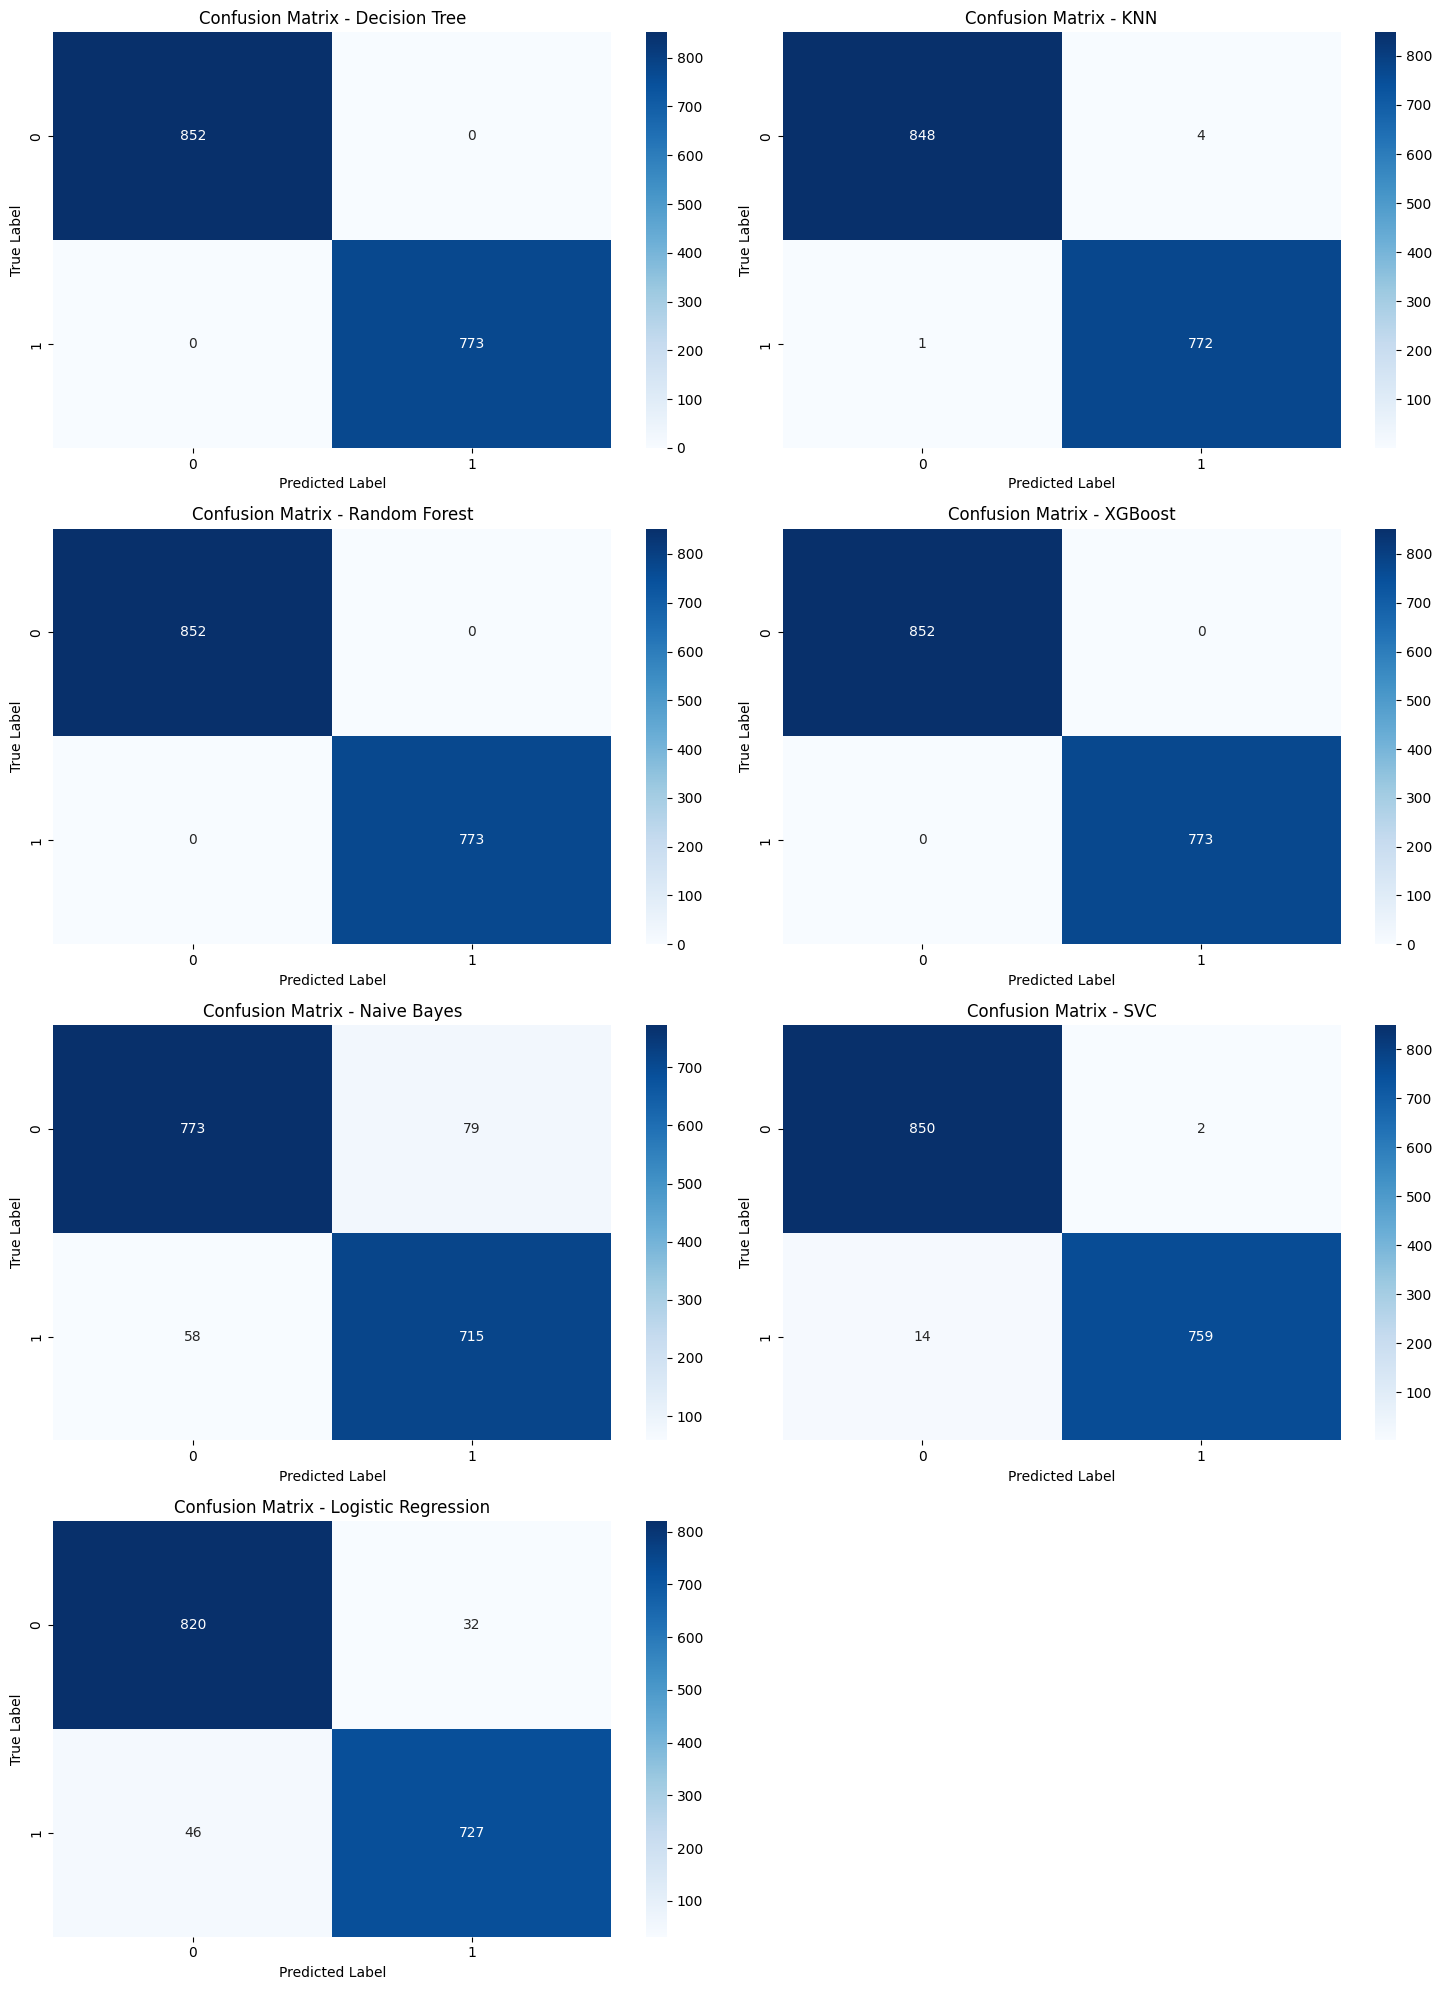

In [62]:
# Calculate number of rows needed based on number of models
n_models = len(models)
n_rows = (n_models + 1) // 2  # This will give us enough rows to fit all models
plt.figure(figsize=(15, 5*n_rows))

for i, (name, (model, predictions)) in enumerate(models.items(), 1):
    plt.subplot(n_rows, 2, i)
    cm = confusion_matrix(test_labels, predictions)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

plt.tight_layout()
plt.show()


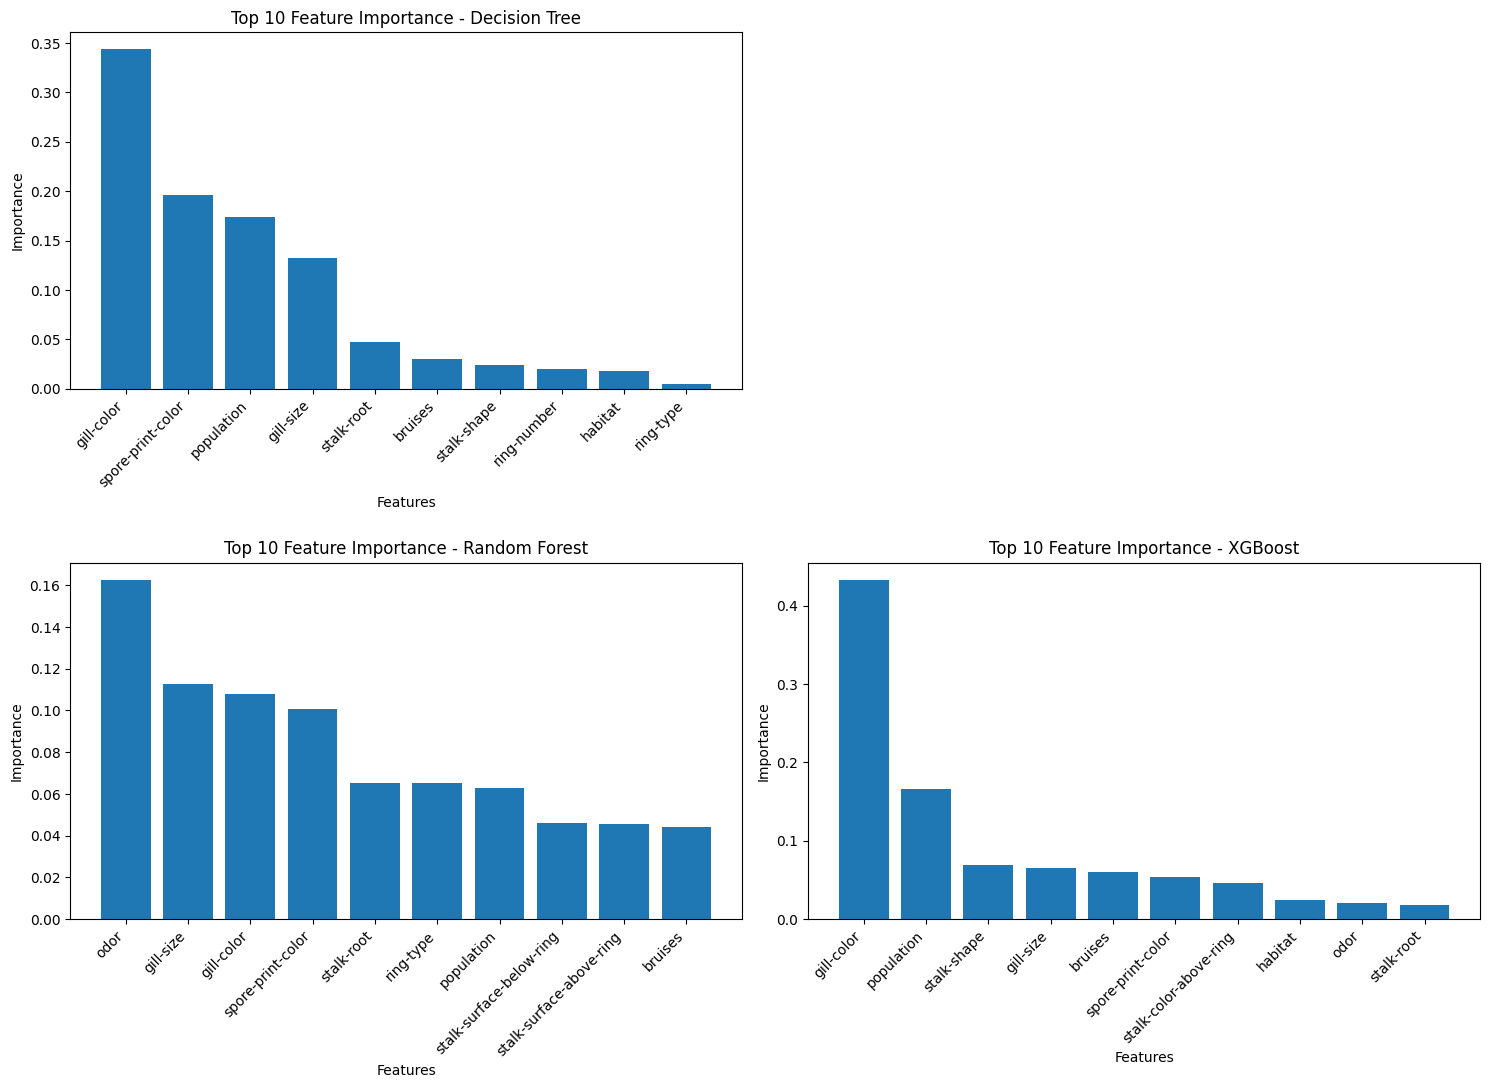

In [69]:
# Visualize feature importance for applicable models
plt.figure(figsize=(15, 5*n_rows))

for i, (name, (model, predictions)) in enumerate(models.items(), 1):
    # Skip models that don't have feature importance
    if not hasattr(model, 'feature_importances_'):
        continue
        
    plt.subplot(n_rows, 2, i)
    
    # Get feature importance
    importances = model.feature_importances_
    feature_names = train_features.columns
    
    # Sort features by importance
    indices = np.argsort(importances)[::-1]
    
    # Plot top 10 features
    plt.bar(range(10), importances[indices][:10])
    plt.xticks(range(10), [feature_names[i] for i in indices][:10], rotation=45, ha='right')
    plt.title(f'Top 10 Feature Importance - {name}')
    plt.xlabel('Features')
    plt.ylabel('Importance')

plt.tight_layout()
plt.show()
